<a href="https://colab.research.google.com/github/VadlamudiVarshitaa/-Fake-News-Detection/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/True.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,Gingrich doesn't rule out Trump VP role,WASHINGTON (Reuters) - Republican veteran Newt...,politicsNews,"May 12, 2016",true
1,Republicans confident of passing House tax bil...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"November 13, 2017",true
2,Boston Globe Goes #NeverTrump On Its Front Pa...,The Boston Globe will publish a satirical fron...,News,"April 9, 2016",fake
3,Trump taps Retired General Kelly to lead Homel...,WASHINGTON (Reuters) - Republican U.S. Preside...,politicsNews,"December 12, 2016",true
4,South Africa's Zuma appoints permanent police ...,JOHANNESBURG (Reuters) - South African Preside...,worldnews,"November 22, 2017",true


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Gingrich doesn't rule out Trump VP role,WASHINGTON (Reuters) - Republican veteran Newt...,politicsNews,true
1,Republicans confident of passing House tax bil...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,true
2,Boston Globe Goes #NeverTrump On Its Front Pa...,The Boston Globe will publish a satirical fron...,News,fake
3,Trump taps Retired General Kelly to lead Homel...,WASHINGTON (Reuters) - Republican U.S. Preside...,politicsNews,true
4,South Africa's Zuma appoints permanent police ...,JOHANNESBURG (Reuters) - South African Preside...,worldnews,true


In [ ]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - Republican veteran Newt...,politicsNews,true
1,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,true
2,The Boston Globe will publish a satirical fron...,News,fake
3,WASHINGTON (Reuters) - Republican U.S. Preside...,politicsNews,true
4,JOHANNESBURG (Reuters) - South African Preside...,worldnews,true


In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - republican veteran newt...,politicsNews,true
1,washington (reuters) - the u.s. house of repre...,politicsNews,true
2,the boston globe will publish a satirical fron...,News,fake
3,washington (reuters) - republican u.s. preside...,politicsNews,true
4,johannesburg (reuters) - south african preside...,worldnews,true


In [ ]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
data.head()

,text,subject,target
0,washington reuters republican veteran newt gi...,politicsNews,true
1,washington reuters the us house of representa...,politicsNews,true
2,the boston globe will publish a satirical fron...,News,fake
3,washington reuters republican us presidentele...,politicsNews,true
4,johannesburg reuters south african president ...,worldnews,true


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,washington reuters republican veteran newt gin...,politicsNews,true
1,washington reuters us house representatives re...,politicsNews,true
2,boston globe publish satirical front page sund...,News,fake
3,washington reuters republican us presidentelec...,politicsNews,true
4,johannesburg reuters south african president j...,worldnews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


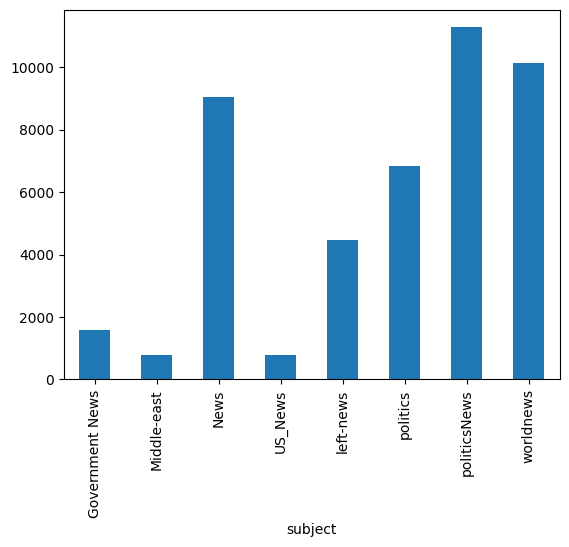

In [ ]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


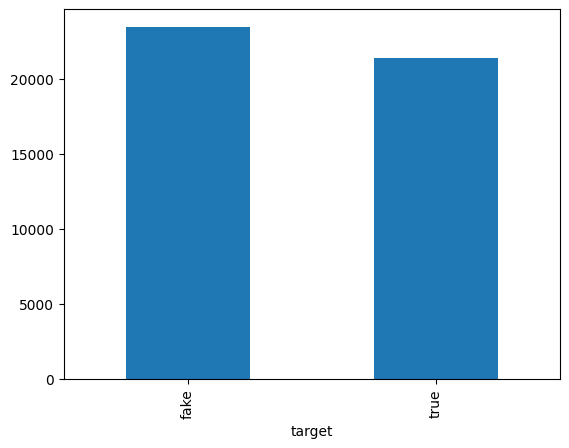

In [ ]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

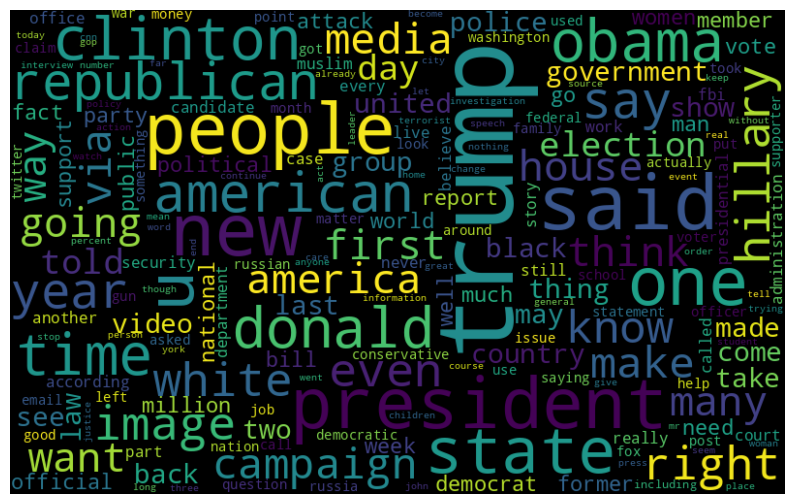

In [ ]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

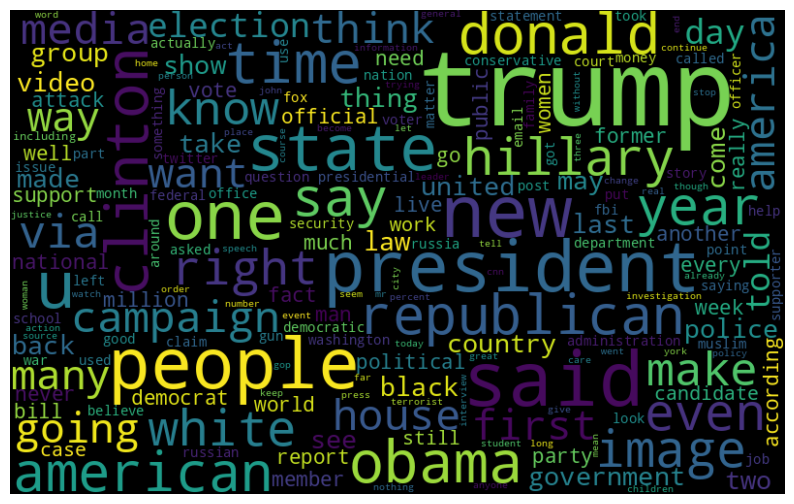

In [ ]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

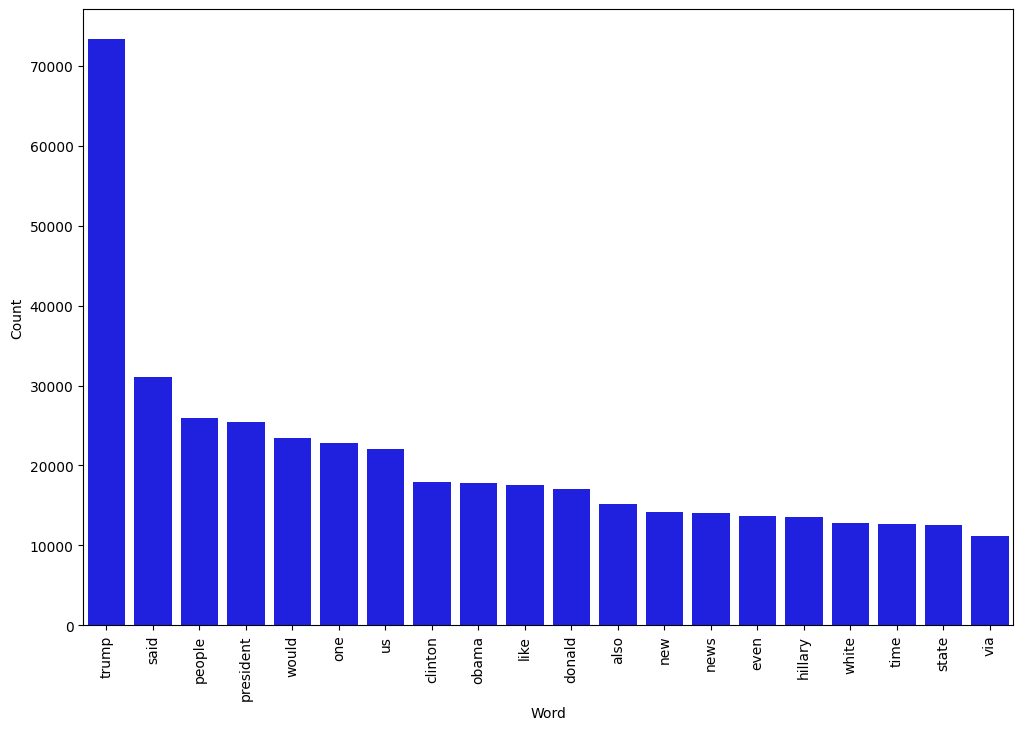

In [ ]:
counter(data[data["target"] == "fake"], "text", 20)

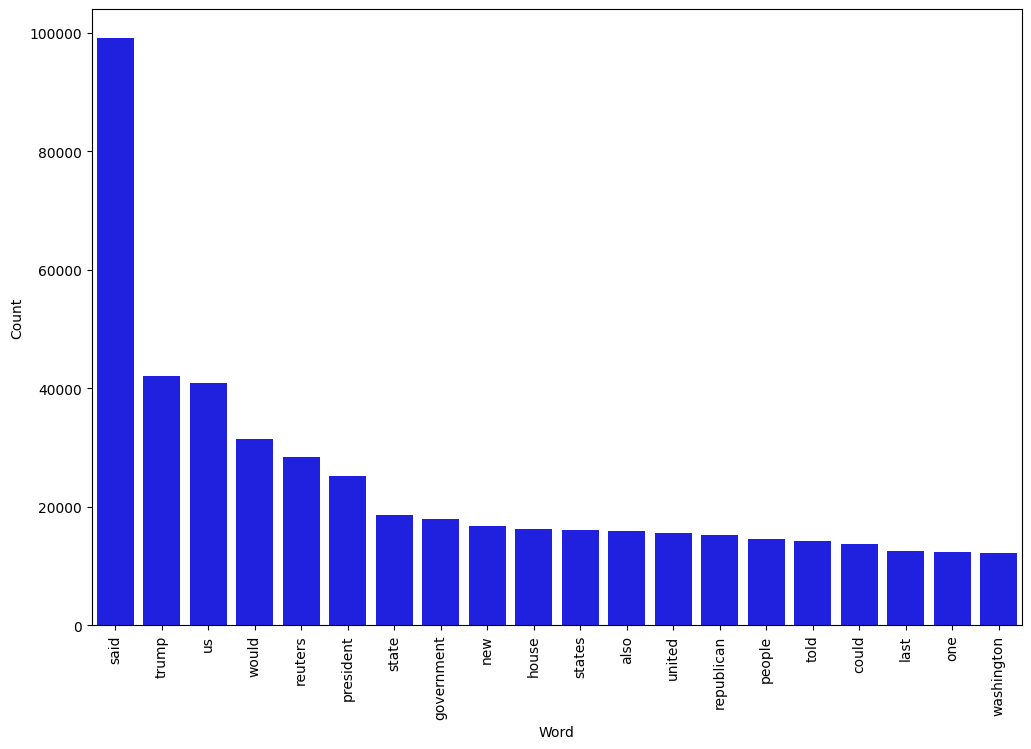

In [ ]:
counter(data[data["target"] == "true"], "text", 20)

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.91%


Confusion matrix, without normalization


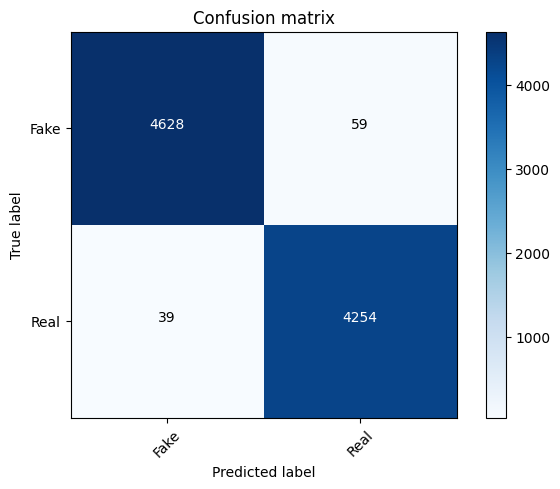

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.54%


Confusion matrix, without normalization


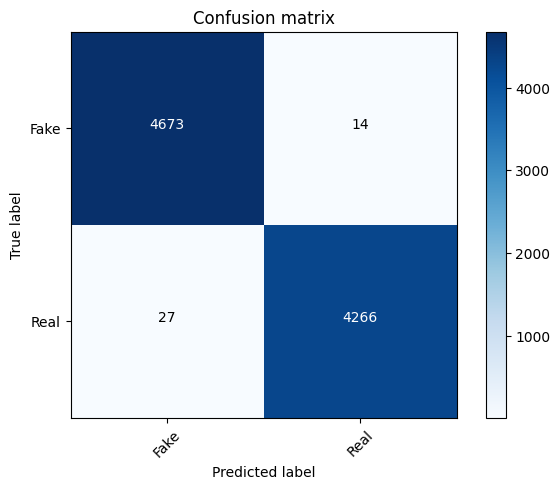

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.16%


Confusion matrix, without normalization


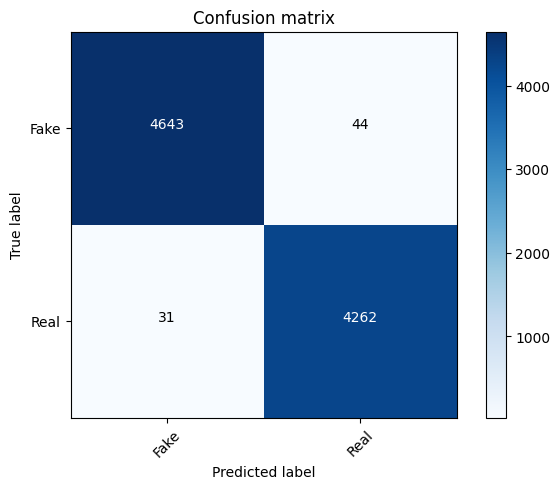

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])